In [1]:
import os
from pathlib import Path
dir_path = Path(r"/Users/rabinatwayana/Rabina/CDE II/Wildfire Project/SAR-Burnt-Area-Mapping/")
if dir_path.exists():
    os.chdir(dir_path)
else:
    print("Directory does not exist! Please check the path.")
!pwd

/Users/rabinatwayana/Rabina/CDE II/Wildfire Project/SAR-Burnt-Area-Mapping


In [2]:
import rasterio
from rasterio.windows import from_bounds
import geopandas as gpd
from shapely.geometry import box
import numpy as np
from utils import glcm_average, clip_image, compute_pca, compute_dglcm, compute_asc_desc_dglcm, compute_pca, glcm_single
import config

# TILE_SIZE=config.TILE_SIZE
PALISADE_CLIP_EXTENT=config.PALISADE_CLIP_EXTENT

In [3]:
pre_asc_image_path="../Asc_S1_Palisades/10_GLCM/S1A_asc_TC_subset_glcm_pre_32611.tif"
post_asc_image_path="../Asc_S1_Palisades/10_GLCM/S1A_asc_TC_subset_glcm_post_32611.tif"
pre_desc_image_path="../Desc_S1_Palisades/10_GLCM/S1A_desc_TC_subset_glcm_pre_32611.tif"
post_desc_image_path="../Desc_S1_Palisades/10_GLCM/S1A_desc_TC_subset_glcm_post_32611.tif"

# pre_asc_avg_output_path="MachineLearning/input/glcm/01_avg/S1A_asc_glcm_pre_avg.tif"
# post_asc_avg_output_path="MachineLearning/input/glcm/01_avg/S1A_asc_glcm_post_avg.tif"
# pre_desc_avg_output_path="MachineLearning/input/glcm/01_avg/S1A_desc_glcm_pre_avg.tif"
# post_desc_avg_output_path="MachineLearning/input/glcm/01_avg/S1A_desc_glcm_post_avg.tif"

pre_asc_single_output_path="MachineLearning/input/glcm/01_avg/S1A_asc_glcm_pre_single.tif"
post_asc_single_output_path="MachineLearning/input/glcm/01_avg/S1A_asc_glcm_post_single.tif"
pre_desc_single_output_path="MachineLearning/input/glcm/01_avg/S1A_desc_glcm_pre_single.tif"
post_desc_single_output_path="MachineLearning/input/glcm/01_avg/S1A_desc_glcm_post_single.tif"

# glcm_average(pre_asc_image_path,pre_asc_avg_output_path)
# glcm_average(post_asc_image_path,post_asc_avg_output_path)
# glcm_average(pre_desc_image_path,pre_desc_avg_output_path)
# glcm_average(post_desc_image_path,post_desc_avg_output_path)

# glcm_single(pre_asc_image_path,pre_asc_single_output_path,40,60)
# glcm_single(post_asc_image_path,post_asc_single_output_path,0,20)
# glcm_single(pre_desc_image_path,pre_desc_single_output_path,40,60)
# glcm_single(post_desc_image_path,post_desc_single_output_path,0,20)

In [4]:
# minx, miny, maxx, maxy=337276.20835215, 3762751.49928493, 370706.59898943, 3781200.70468214
# minx, miny, maxx, maxy=337753.18431539, 3764297.11729034,  366389.7346297,  3780029.79471481
# clip_extent = (minx, miny, maxx, maxy)

# pre_asc_clip_output_path="MachineLearning/input/glcm/02_clip/S1A_asc_glcm_pre_avg_clip.tif"
# post_asc_clip_output_path="MachineLearning/input/glcm/02_clip/S1A_asc_glcm_post_avg_clip.tif"
# pre_desc_clip_output_path="MachineLearning/input/glcm/02_clip/S1A_desc_glcm_pre_avg_clip.tif"
# post_desc_clip_output_path="MachineLearning/input/glcm/02_clip/S1A_desc_glcm_post_avg_clip.tif"

# clip_image(pre_asc_avg_output_path,pre_asc_clip_output_path,PALISADE_CLIP_EXTENT)
# clip_image(post_asc_avg_output_path,post_asc_clip_output_path,PALISADE_CLIP_EXTENT)
# clip_image(pre_desc_avg_output_path,pre_desc_clip_output_path,PALISADE_CLIP_EXTENT)
# clip_image(post_desc_avg_output_path,post_desc_clip_output_path,PALISADE_CLIP_EXTENT)


pre_asc_single_clip_output_path="MachineLearning/input/glcm/02_clip/S1A_asc_glcm_pre_single_clip.tif"
post_asc_single_clip_output_path="MachineLearning/input/glcm/02_clip/S1A_asc_glcm_post_single_clip.tif"
pre_desc_single_clip_output_path="MachineLearning/input/glcm/02_clip/S1A_desc_glcm_pre_single_clip.tif"
post_desc_single_clip_output_path="MachineLearning/input/glcm/02_clip/S1A_desc_glcm_post_single_clip.tif"

# clip_image(pre_asc_single_output_path,pre_asc_single_clip_output_path,PALISADE_CLIP_EXTENT)
# clip_image(post_asc_single_output_path,post_asc_single_clip_output_path,PALISADE_CLIP_EXTENT)
# clip_image(pre_desc_single_output_path,pre_desc_single_clip_output_path,PALISADE_CLIP_EXTENT)
# clip_image(post_desc_single_output_path,post_desc_single_clip_output_path,PALISADE_CLIP_EXTENT)


In [6]:
output_asc_dGLCM_path="MachineLearning/input/glcm/03_dglcm/palisade_asc_dGLCM.tif"
output_desc_dGLCM_path="MachineLearning/input/glcm/03_dglcm/palisade_desc_dGLCM.tif"
# compute_dglcm(pre_asc_clip_output_path,post_asc_clip_output_path,output_asc_dGLCM_path)
# compute_dglcm(pre_desc_clip_output_path,post_desc_clip_output_path,output_desc_dGLCM_path)

output_asc_single_dGLCM_path="MachineLearning/input/glcm/03_dglcm/palisade_asc_dGLCM_single.tif"
output_desc_single_dGLCM_path="MachineLearning/input/glcm/03_dglcm/palisade_desc_dGLCM_single.tif"
# compute_dglcm(pre_asc_single_clip_output_path,post_asc_single_clip_output_path,output_asc_single_dGLCM_path)
# compute_dglcm(pre_desc_single_clip_output_path,post_desc_single_clip_output_path,output_desc_single_dGLCM_path)

In [7]:
output_asc_desc_path="MachineLearning/input/glcm/03_dglcm/palisade_asc_desc_dGLCM.tif"
compute_asc_desc_dglcm(output_asc_dGLCM_path,output_desc_dGLCM_path,output_asc_desc_path)

output_asc_desc_single_path="MachineLearning/input/glcm/03_dglcm/palisade_asc_desc_dGLCM.tif"
compute_asc_desc_dglcm(output_asc_single_dGLCM_path,output_desc_single_dGLCM_path,output_asc_desc_single_path)

Saved dglcm to MachineLearning/input/glcm/03_dglcm/palisade_asc_desc_dGLCM.tif
Saved dglcm to MachineLearning/input/glcm/03_dglcm/palisade_asc_desc_dGLCM.tif


-45.0 93.0
Number of principal components selected: 3
-61.16123 81.36974


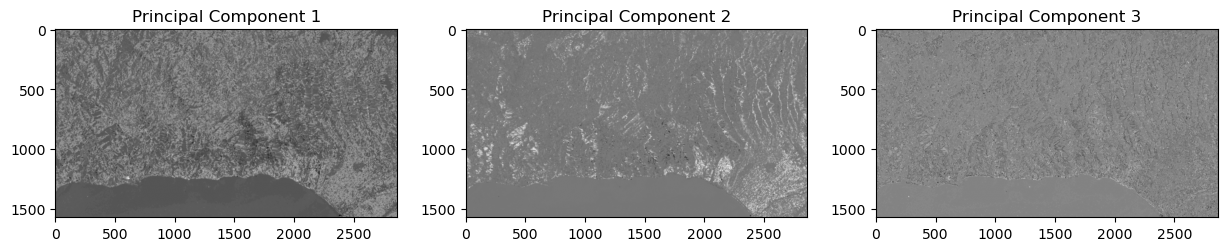

-45.0 93.0
Number of principal components selected: 3
-61.16123 81.36974


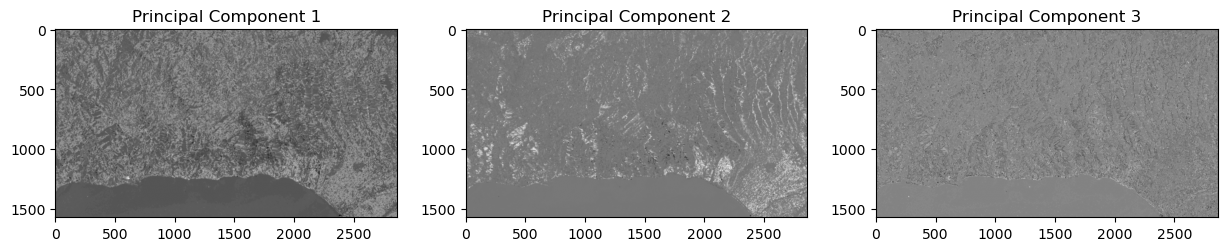

In [8]:
output_pca_path="MachineLearning/input/glcm/04_pca/palisade_asc_desc_dGLCM_pca.tif"
compute_pca(output_asc_desc_path,output_pca_path,3)

output_pca_single_path="MachineLearning/input/glcm/04_pca/palisade_asc_desc_dGLCM_pca_single.tif"
compute_pca(output_asc_desc_single_path,output_pca_single_path,3)